# Image Processing & Segmentation

# Gray-Level Transformation

## Histogram Equalization 
#### The following code uses Histogram Equalization to improve contrast in MRI image

(-0.5, 255.5, 255.5, -0.5)

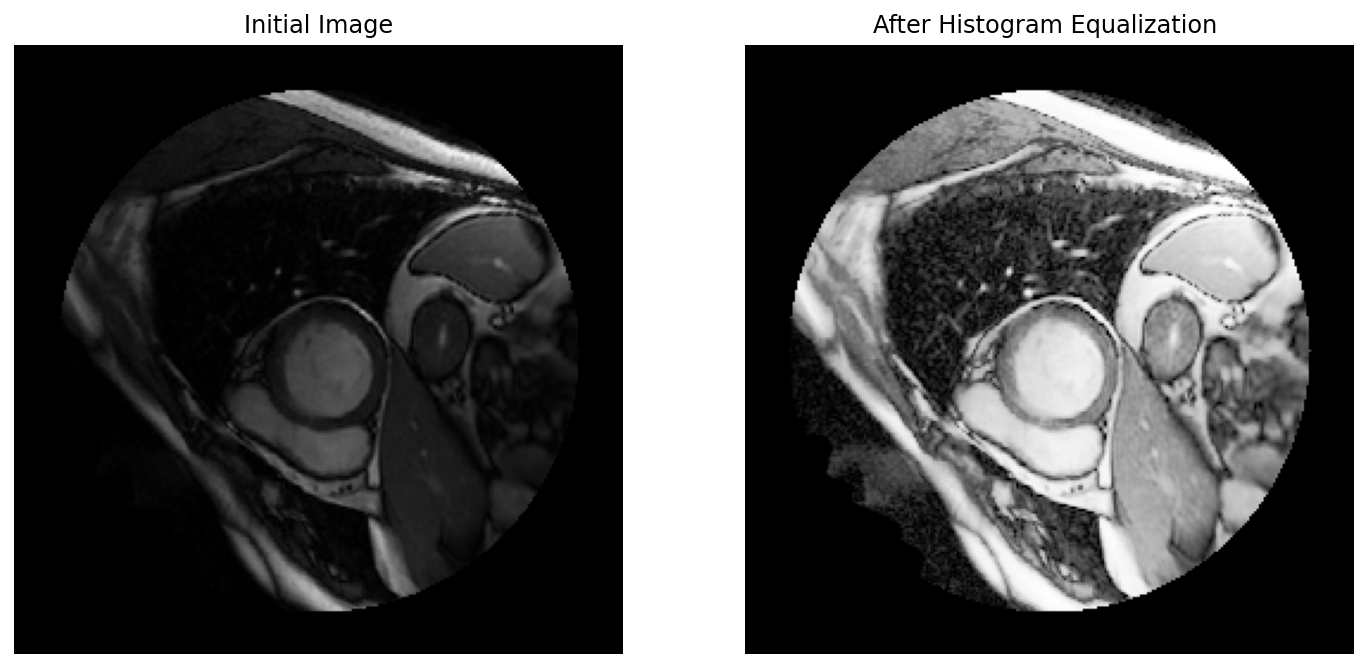

In [8]:
import matplotlib.pyplot as plt
from skimage import exposure
from skimage import io
image10 = io.imread('CAP_SCD0000101_MR__hrt_raw_20120813120604507_78.dcm')
equalized_hist_image10 = exposure.equalize_hist(image10)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(image10, cmap="gray")
axarr[0].set_title("Initial Image")
axarr[0].axis('off')
axarr[1].imshow(equalized_hist_image10, cmap="gray")
axarr[1].set_title("After Histogram Equalization ")
axarr[1].axis('off')

## Gamma Transformation
#### The following code uses Gamma Transformation to improve contrast in MRI image

(-0.5, 255.5, 255.5, -0.5)

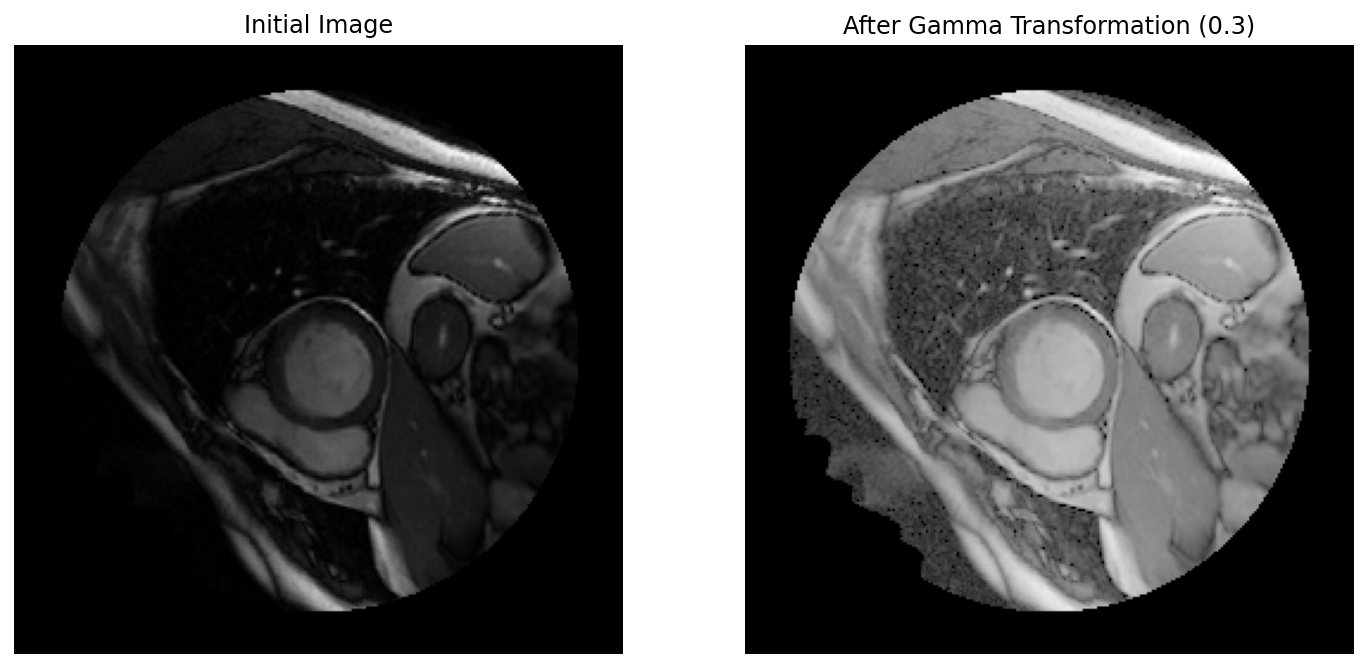

In [18]:
import matplotlib.pyplot as plt
from skimage import exposure
from skimage import io
image10 = io.imread('CAP_SCD0000101_MR__hrt_raw_20120813120604507_78.dcm')
gamma_corrected_image10 = exposure.adjust_gamma(image10, 0.3)
gamma_corrected_image10v2 = exposure.adjust_gamma(image10, 1)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(image10, cmap="gray")
axarr[0].set_title("Initial Image")
axarr[0].axis('off')
axarr[1].imshow(gamma_corrected_image10, cmap="gray")
axarr[1].set_title("After Gamma Transformation (0.3)")
axarr[1].axis('off')

## Contrast Adjustment
#### The following code uses Contrast Adjustment to improve contrast in MRI image
###### I found no difference

(-0.5, 255.5, 255.5, -0.5)

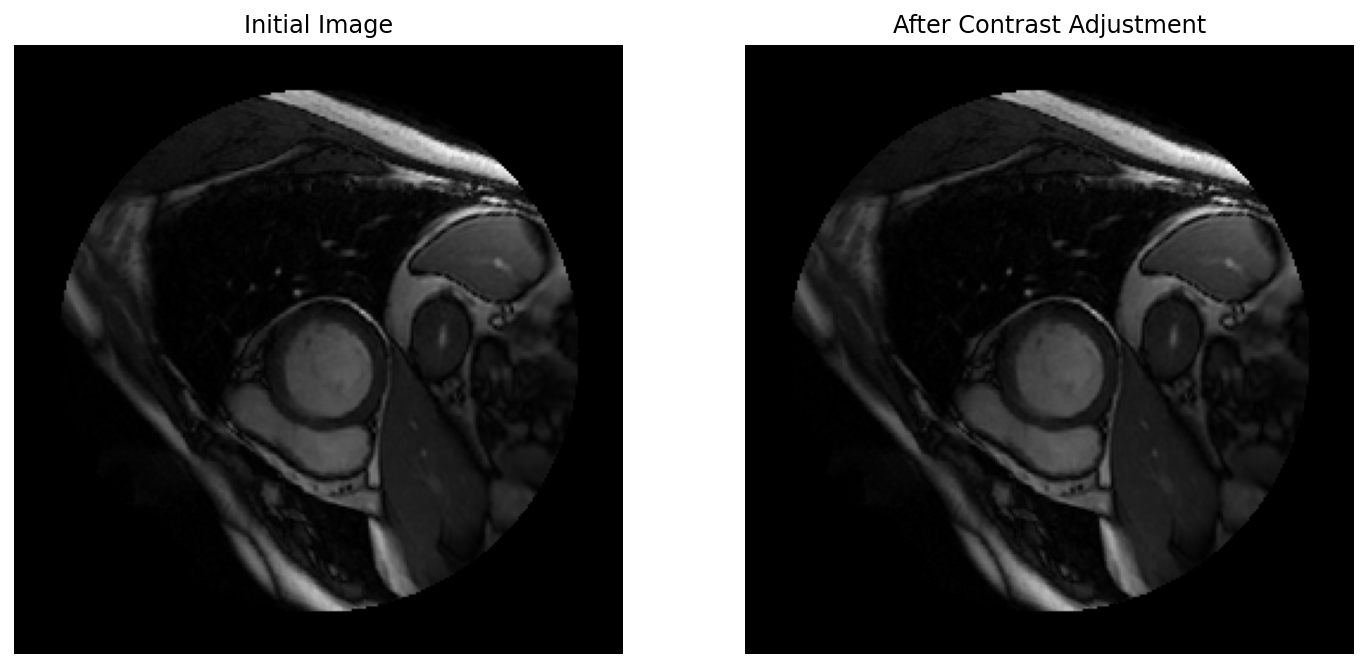

In [27]:
import matplotlib.pyplot as plt
from skimage import exposure
from skimage import io
image10 = io.imread('CAP_SCD0000101_MR__hrt_raw_20120813120604507_78.dcm')
Contrast_Adjustment_image10 = exposure.adjust_log(image10, 1)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(image10, cmap="gray")
axarr[0].set_title("Initial Image")
axarr[0].axis('off')
axarr[1].imshow(Contrast_Adjustment_image10, cmap="gray")
axarr[1].set_title("After Contrast Adjustment")
axarr[1].axis('off')

# Filters

### Gaussian Filter

(-0.5, 255.5, 255.5, -0.5)

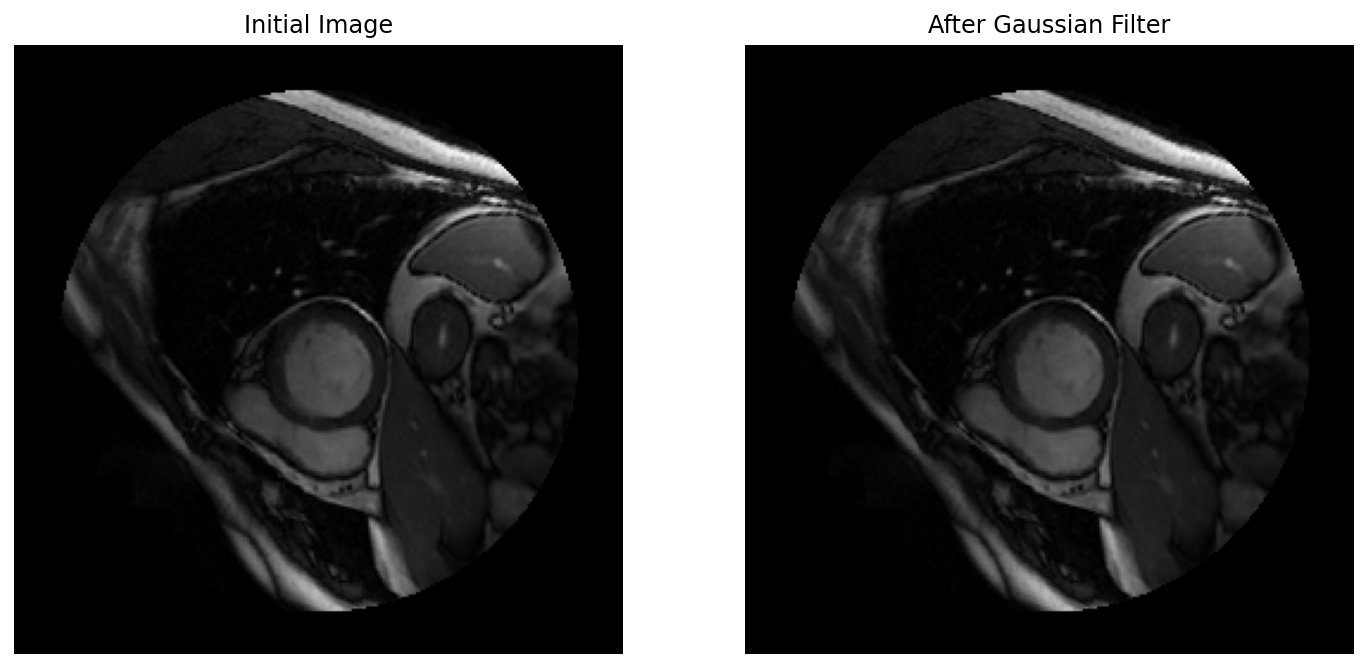

In [5]:
from skimage.filters import gaussian
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
image10 = io.imread('CAP_SCD0000101_MR__hrt_raw_20120813120604507_78.dcm')
filtered_Gaussian_image10 = gaussian(image10, sigma=0.001, multichannel=True)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(image10, cmap="gray")
axarr[0].set_title("Initial Image")
axarr[0].axis('off')
axarr[1].imshow(filtered_Gaussian_image10, cmap="gray")
axarr[1].set_title("After Gaussian Filter")
axarr[1].axis('off')


### Median Filter

(-0.5, 255.5, 255.5, -0.5)

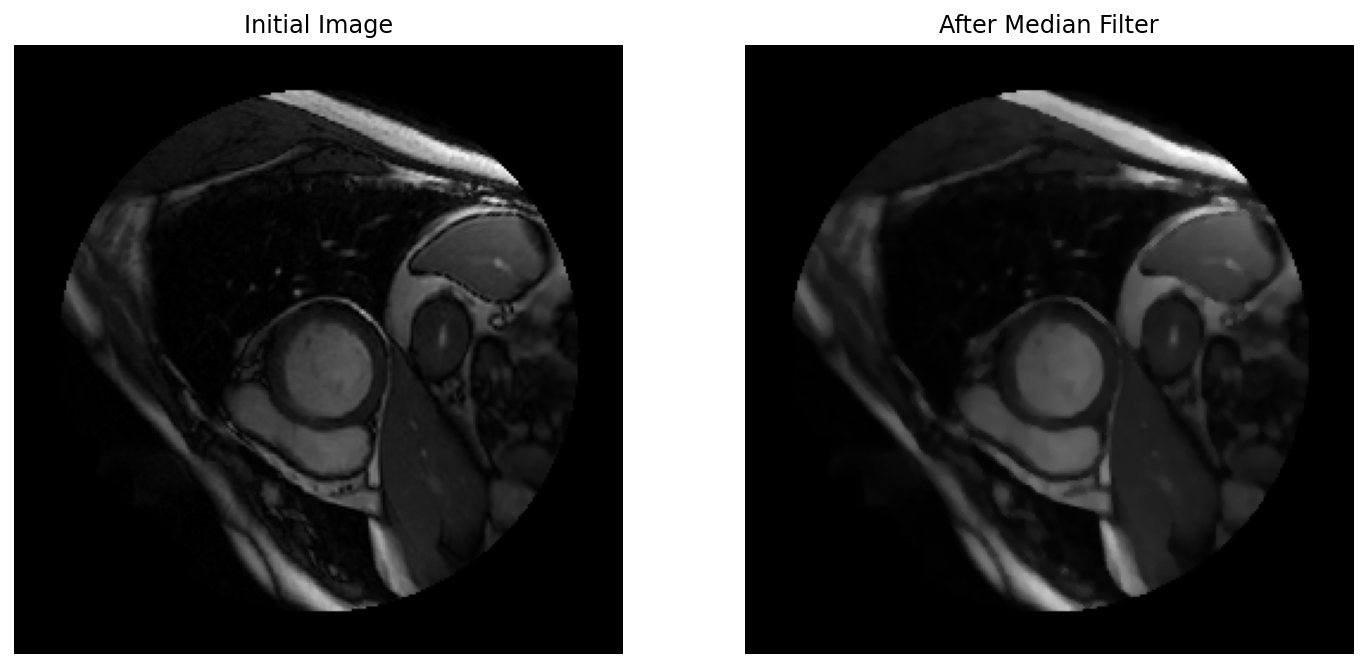

In [12]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import disk
from skimage.filters import median
image10 = io.imread('CAP_SCD0000101_MR__hrt_raw_20120813120604507_78.dcm')
filtered_Median_image10= median(image10, disk(2))
f, axarr = plt.subplots(1,2)
axarr[0].imshow(image10, cmap="gray")
axarr[0].set_title("Initial Image")
axarr[0].axis('off')
axarr[1].imshow(filtered_Median_image10, cmap="gray")
axarr[1].set_title("After Median Filter")
axarr[1].axis('off')

### Laplacian Filter

(-0.5, 255.5, 255.5, -0.5)

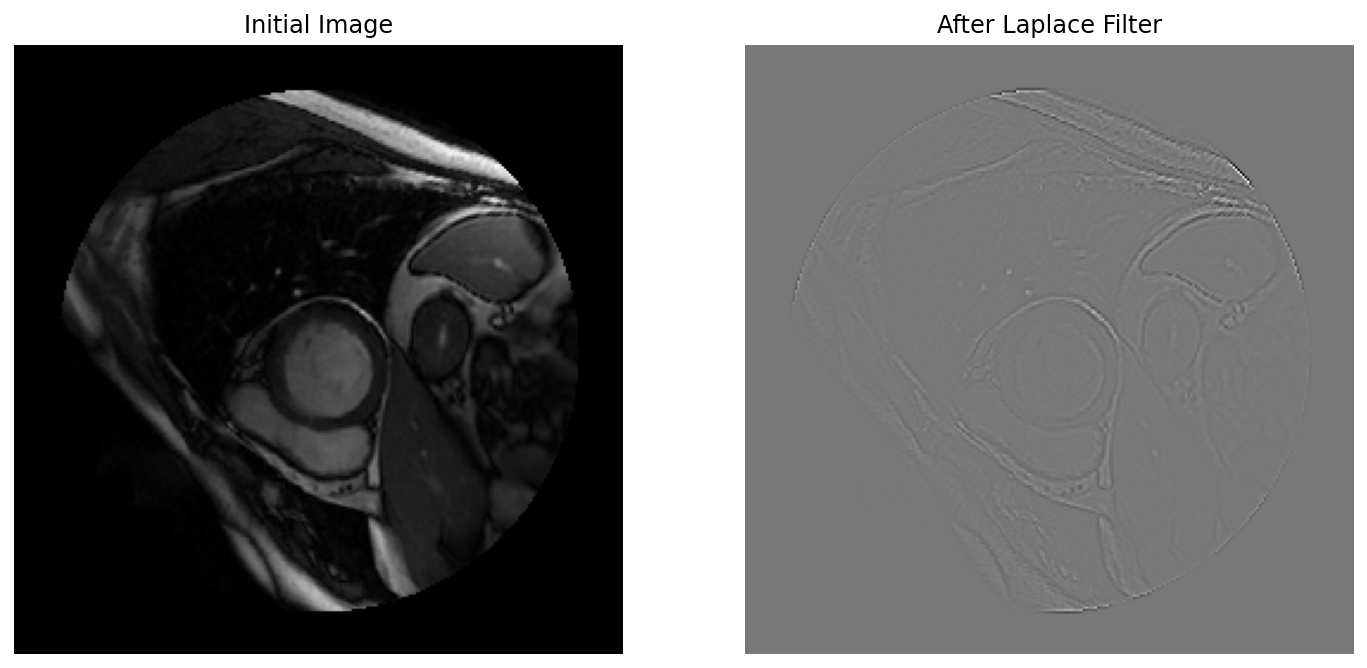

In [8]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import laplace
image10 = io.imread('CAP_SCD0000101_MR__hrt_raw_20120813120604507_78.dcm')
filtered_Laplace_image10= laplace(image10, ksize=3, mask=None)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(image10, cmap="gray")
axarr[0].set_title("Initial Image")
axarr[0].axis('off')
axarr[1].imshow(filtered_Laplace_image10, cmap="gray")
axarr[1].set_title("After Laplace Filter")
axarr[1].axis('off')

# Segmentation

## Threshholding + Active Contour

##### Functions

In [2]:
def circle_points(resolution, center, radius):
    #Generate points which define a circle on an image.Centre refers to the centre of the circle 
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)

    return np.array([c, r]).T
# Exclude last point because a closed path should not have duplicate points
points = circle_points(290, [130, 132], 40)[:-2]

def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

##### Segmenting Left Ventricle SAX view

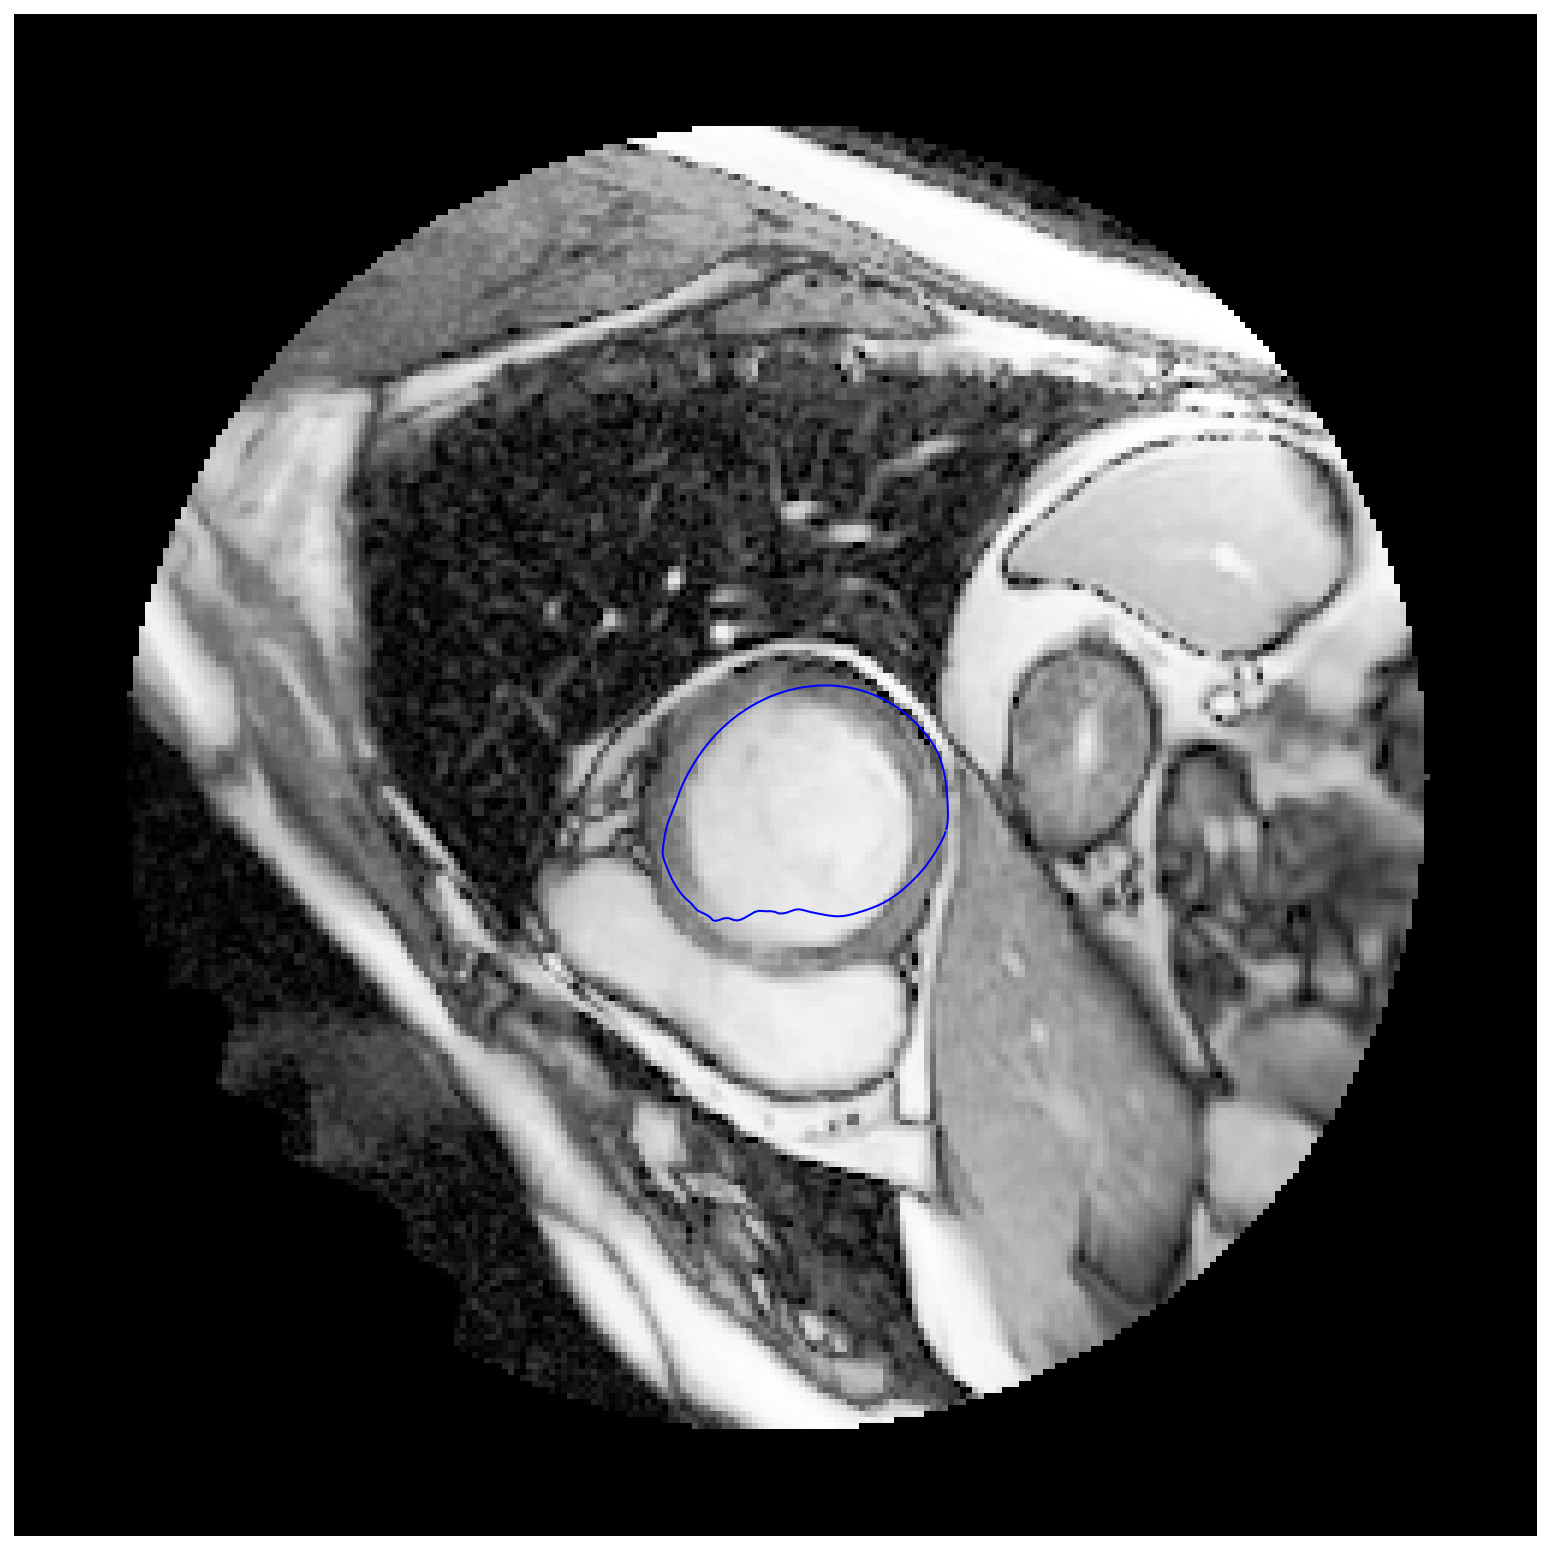

In [3]:
import matplotlib.pyplot as plt
from skimage import exposure
from skimage import io
import numpy as np
import skimage.segmentation as seg
image10 = io.imread('CAP_SCD0000101_MR__hrt_raw_20120813120604507_78.dcm')
equalized_hist_image10 = exposure.equalize_hist(image10)
points = circle_points(190, [135, 130], 20)[:-2]
snake = seg.active_contour(equalized_hist_image10, points,alpha=0.06,beta=100, coordinates='rc')
fig, ax = image_show(equalized_hist_image10)
#ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=1);